In [1]:
import pandas as pd
import re
import string
import numpy as np
# from sentiment_module import sentiment
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
# from nltk.corpus import gutenberg
# from pprint import pprint
import seaborn as sns
# %load_ext jupyternotify

In [26]:
!ls

README.md                     model5.gensim.expElogbeta.npy
__pycache__                   model5.gensim.id2word
corpus.pkl                    model5.gensim.state
datasciencejob                reading data-Copy1.ipynb
dictionary.gensim             reading data.ipynb
lda.html                      reference code
model5.gensim                 text_mining.ipynb


In [27]:
!pwd

/Users/Quantum/GitHub/DataScienceJob


In [29]:
data_NC = pd.read_json('datasciencejob/datasciencejob/scrapy-NC-test.json')
print(data_NC.info())
data_nodups = data_NC.drop_duplicates('desc')
data_nodups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
company     138 non-null object
desc        138 non-null object
link        138 non-null object
location    138 non-null object
title       138 non-null object
dtypes: object(5)
memory usage: 5.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 129
Data columns (total 5 columns):
company     87 non-null object
desc        87 non-null object
link        87 non-null object
location    87 non-null object
title       87 non-null object
dtypes: object(5)
memory usage: 4.1+ KB


In [30]:
data_NC.drop_duplicates('link').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 5 columns):
company     138 non-null object
desc        138 non-null object
link        138 non-null object
location    138 non-null object
title       138 non-null object
dtypes: object(5)
memory usage: 6.5+ KB


In [31]:
data_NC.link.value_counts().describe()

count    138.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: link, dtype: float64

In [32]:
data_NC.desc.value_counts().iloc[0]

11

In [33]:
most_desc = data_NC.desc.value_counts().index[1]

In [34]:
data_NC[data_NC['desc']==most_desc].link.head()

8     https://www.indeed.com/viewjob?jk=d07d07dc8647...
25    https://www.indeed.com/viewjob?jk=d07d07dc8647...
39    https://www.indeed.com/viewjob?jk=d07d07dc8647...
76    https://www.indeed.com/viewjob?jk=d07d07dc8647...
87    https://www.indeed.com/viewjob?jk=d07d07dc8647...
Name: link, dtype: object

In [14]:
a = data_NC[data_NC['desc']==most_desc].link[8]

In [35]:
b = data_NC[data_NC['desc']==most_desc].link[25]

In [36]:
a == b

False

In [37]:
a

'https://www.indeed.com/viewjob?jk=90c21b96a5637480&tk=1d008567f0k49000&from=serp&alid=3&advn=8831463488439869&sjdu=6ByzYMZLGYUgyrbSdN0cjPX2jdbpXxH8PmbHxAvcgLJrfZloXh5EGd5b1Oy79UTBvanWwk3xXg0exTPcUAcTlCC2o9fk28gZSWQy2cmrFmdVO6FemStrxHC9CiOMlK_iS-97Gillj1wx3CM-hpeeUEcu1Rt1JQVPrikN0aGnz9jJDxhIg8jpkef65yvctzmN'

In [38]:
b

'https://www.indeed.com/viewjob?jk=d07d07dc8647e9e3&tk=1d0soldei5mdu800&from=serp&alid=3&advn=673911178754783&sjdu=WVMBybgNdW-1DCfa0oS1-w6T3usErEM5OGCslY3OpP1qqLItkzgloisugwnizSkZfiHXhEpQwVpxQOrGJ3uxxXqjiSVUiQmxH8ROPIPKQavEQHpjJaF0Tv9fmzfMRVAvc5JK5Nz2wWT_DjUh9jsF4w'

In [16]:
a.str == b

False

In [13]:
data_NC[data_NC['desc']==most_desc].link[5] == data_NC[data_NC['desc']==most_desc].link[11]

False

In [84]:
data_NC = pd.read_json('datasciencejob/scrapy-NC.json')
print(data_NC.info())
data = data_NC.drop_duplicates('desc')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 5 columns):
company     1105 non-null object
desc        1105 non-null object
link        1105 non-null object
location    1105 non-null object
title       1105 non-null object
dtypes: object(5)
memory usage: 43.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 828
Data columns (total 5 columns):
company     345 non-null object
desc        345 non-null object
link        345 non-null object
location    345 non-null object
title       345 non-null object
dtypes: object(5)
memory usage: 16.2+ KB


In [82]:
data = pd.read_json('datasciencejob/scrapy-bs4-1000.json')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
company     547 non-null object
desc        547 non-null object
link        547 non-null object
location    547 non-null object
title       547 non-null object
dtypes: object(5)
memory usage: 21.4+ KB
None


,company,desc,link,location,title
0,Pairwise,Overview\nPairwise believes healthy food shoul...,https://www.indeed.com/viewjob?jk=73ab6e070c37...,"Pairwise-Raleigh-Durham, NC",Data and Visual Analytics Engineer
1,Proofpoint,"Company Overview\nAt Proofpoint, we have a pas...",https://www.indeed.com/viewjob?jk=4fd6e1706ad3...,"Proofpoint29 reviews-Raleigh, NC",Senior Data Scientist
2,Duke University,We are looking for a Postdoctoral Associate wi...,https://www.indeed.com/cmp/Duke-University/job...,"Duke University859 reviews-Durham, NC",Postdoctoral Associate in Machine Learning for...
3,State of North Carolina,"$55,000 - $75,000 a yearThis position has been...",https://www.indeed.com/viewjob?jk=bce2378117d1...,State of North Carolina208 reviews-Wake County...,Business Analyst
4,Kitware,InternshipJob Description:\nKitware is develop...,https://www.indeed.com/viewjob?jk=2d541f2987ac...,"Kitware-Carrboro, NC 27510",Research and Development Engineer - Machine Le...


In [65]:
data.company.value_counts()

Veritude                                             91
Bandwidth                                            91
First Citizens Bank & Trust Company                  89
Hill-Rom                                             64
NTT DATA Services                                    47
Cengage                                              20
Duke University and Duke University Health System    10
IQVIA                                                 7
Cisco                                                 4
Resolvit, LLC                                         4
Conduent                                              3
Pairwise                                              3
Syneos Health Clinical                                3
IBM                                                   3
Red Hat, Inc.                                         3
Hewlett Packard Enterprise                            2
Avalara                                               2
CoreCompete                                     

In [75]:
data.title.value_counts()

Data Scientist                                                              96
Data Analyst, International                                                 90
Data Loss Protection Engineer                                               89
Senior Data Analytics R&D Engineer                                          64
Data Scientist - Big Data                                                   42
Senior Software Engineer (Machine Learning)                                 20
Data Engineer                                                                9
Big Data Engineer                                                            6
Senior Big Data Engineer                                                     5
Principal Big Data Engineer                                                  4
Data Analyst                                                                 3
Senior Data Scientist                                                        3
Machine Learning Researcher                         

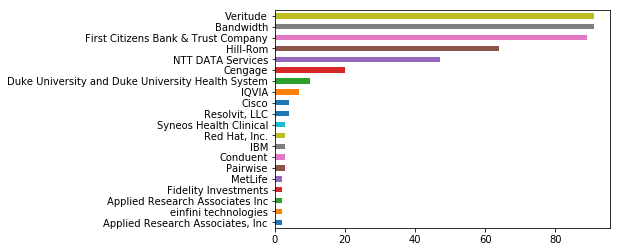

In [35]:
data.company.value_counts().sort_values().tail(20).plot(kind='barh')

In [44]:
data_json[['company','desc']].drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 229
Data columns (total 2 columns):
company    155 non-null object
desc       155 non-null object
dtypes: object(2)
memory usage: 3.6+ KB


In [70]:
data[data['company']=='Veritude'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 25 to 537
Data columns (total 5 columns):
company     91 non-null object
desc        91 non-null object
link        91 non-null object
location    91 non-null object
title       91 non-null object
dtypes: object(5)
memory usage: 4.3+ KB


In [74]:
data[data['company']=='Veritude'][['desc']].drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 25 to 123
Data columns (total 1 columns):
desc    4 non-null object
dtypes: object(1)
memory usage: 64.0+ bytes


In [58]:
desc_1 = data.desc.value_counts().head(1).index.format()[0]

In [68]:
data[data['desc'] == desc_1]

,company,desc,link,location,title


In [65]:
data.company.value_counts()

Veritude                                             91
Bandwidth                                            91
First Citizens Bank & Trust Company                  89
Hill-Rom                                             64
NTT DATA Services                                    47
Cengage                                              20
Duke University and Duke University Health System    10
IQVIA                                                 7
Cisco                                                 4
Resolvit, LLC                                         4
Conduent                                              3
Pairwise                                              3
Syneos Health Clinical                                3
IBM                                                   3
Red Hat, Inc.                                         3
Hewlett Packard Enterprise                            2
Avalara                                               2
CoreCompete                                     

In [65]:
data.company.value_counts()

Veritude                                             91
Bandwidth                                            91
First Citizens Bank & Trust Company                  89
Hill-Rom                                             64
NTT DATA Services                                    47
Cengage                                              20
Duke University and Duke University Health System    10
IQVIA                                                 7
Cisco                                                 4
Resolvit, LLC                                         4
Conduent                                              3
Pairwise                                              3
Syneos Health Clinical                                3
IBM                                                   3
Red Hat, Inc.                                         3
Hewlett Packard Enterprise                            2
Avalara                                               2
CoreCompete                                     

In [80]:
data = data.drop_duplicates(['company','desc']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 229
Data columns (total 5 columns):
company     155 non-null object
desc        155 non-null object
link        155 non-null object
location    155 non-null object
title       155 non-null object
dtypes: object(5)
memory usage: 7.3+ KB


# remove punctuation

In [85]:
data.head()

,company,desc,link,location,title
0,"Red Hat, Inc.","Internship, CommissionAt Red Hat, we connect a...",https://www.indeed.com/viewjob?jk=4ca8fc08fe78...,"Red Hat, Inc.179 reviews-Raleigh, NC",Data Scientist Internship
1,Lunarline,Title: Data Leakage Protection (DLP) Engineer\...,https://www.indeed.com/viewjob?jk=d1f6b37b44e5...,"Lunarline3 reviews-Morrisville, NC",Data Leakage Protection (DLP) Engineer
2,Automated Insights,InternshipAbout Automated Insights\n\nAutomate...,https://www.indeed.com/viewjob?jk=76b11e68bdac...,"Automated Insights2 reviews-Durham, NC 27701","Data Science, Intern"
3,Google,Note: By applying to this position your applic...,https://www.indeed.com/viewjob?jk=61e881a747ba...,"Google2,734 reviews-Chapel Hill, NC 27516","Developer Advocate, Data Science Education"
4,IQVIA,Join us on our exciting journey! IQVIA™ is The...,https://www.indeed.com/viewjob?jk=d610f35e2cb6...,"IQVIA161 reviews-Durham, NC",Project Management Analyst


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


count    345.000000
mean      20.501449
std       14.428477
min        1.000000
25%        9.000000
50%       18.000000
75%       28.000000
max       70.000000
Name: reviewsenlen, dtype: float64

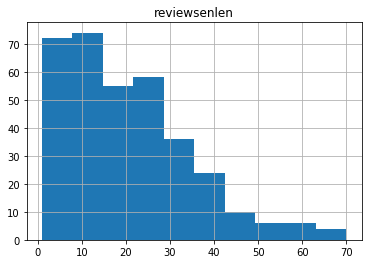

In [86]:
# get sentences of review
default_st=nltk.sent_tokenize
data['reviewsen']=data.desc.apply(lambda x: default_st(text=x))
data['reviewsenlen']=data.reviewsen.apply(len)
# review sentences stat
data.hist('reviewsenlen')
data['reviewsenlen'].describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


count     345.000000
mean      602.000000
std       301.990855
min        28.000000
25%       388.000000
50%       559.000000
75%       784.000000
max      2042.000000
Name: reviewwordlen, dtype: float64

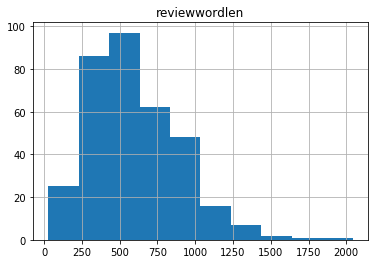

In [87]:
# get sentences of review
default_wt=nltk.word_tokenize
data['reviewword']=data.desc.apply(lambda x: default_wt(text=x))
data['reviewwordlen']=data.reviewword.apply(len)
# review sentences stat
data.hist('reviewwordlen')
data['reviewwordlen'].describe()

In [88]:
data.head()

,company,desc,link,location,title,reviewsen,reviewsenlen,reviewword,reviewwordlen
0,"Red Hat, Inc.","Internship, CommissionAt Red Hat, we connect a...",https://www.indeed.com/viewjob?jk=4ca8fc08fe78...,"Red Hat, Inc.179 reviews-Raleigh, NC",Data Scientist Internship,"[Internship, CommissionAt Red Hat, we connect ...",11,"[Internship, ,, CommissionAt, Red, Hat, ,, we,...",496
1,Lunarline,Title: Data Leakage Protection (DLP) Engineer\...,https://www.indeed.com/viewjob?jk=d1f6b37b44e5...,"Lunarline3 reviews-Morrisville, NC",Data Leakage Protection (DLP) Engineer,[Title: Data Leakage Protection (DLP) Engineer...,19,"[Title, :, Data, Leakage, Protection, (, DLP, ...",263
2,Automated Insights,InternshipAbout Automated Insights\n\nAutomate...,https://www.indeed.com/viewjob?jk=76b11e68bdac...,"Automated Insights2 reviews-Durham, NC 27701","Data Science, Intern",[InternshipAbout Automated Insights\n\nAutomat...,26,"[InternshipAbout, Automated, Insights, Automat...",506
3,Google,Note: By applying to this position your applic...,https://www.indeed.com/viewjob?jk=61e881a747ba...,"Google2,734 reviews-Chapel Hill, NC 27516","Developer Advocate, Data Science Education",[Note: By applying to this position your appli...,27,"[Note, :, By, applying, to, this, position, yo...",562
4,IQVIA,Join us on our exciting journey! IQVIA™ is The...,https://www.indeed.com/viewjob?jk=d610f35e2cb6...,"IQVIA161 reviews-Durham, NC",Project Management Analyst,"[Join us on our exciting journey!, IQVIA™ is T...",24,"[Join, us, on, our, exciting, journey, !, IQVI...",592


In [89]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(('pizza','pizzas','would','dont','didnt'))
string.punctuation
nolem = []
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

def clean_text(text, join=False, stem='lemmatize'):
    # lower case and remove punctuation, here word is char so need '' to join these char back
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    
    text=re.sub(r'\d+', '', text)
    
    # break down to tokens (single word)
    tokens = re.split('\W+', text)
    
    # special words no lemmatize, and remove stop words
    # elif list comprehension: [if-1 condition_1 else_2 for_statement <condition_2>]
    
    if stem == 'lemmatize':
        if join == True:
            text = ' '.join([word if word in nolem else wn.lemmatize(word,'v') for word in tokens if word not in stopwords ])
        else:
            text = [word if word in nolem else wn.lemmatize(word,'v') for word in tokens if word not in stopwords ]
    elif stem == 'stem':
        if join == True:
            text = ' '.join([word if word in nolem else ps.stem(word) for word in tokens if word not in stopwords ])
        else:
            text = [word if word in nolem else ps.stem(word) for word in tokens if word not in stopwords ]
    #nostop = [word for word in tokens if word not in stopwords]
    #text = [wn.lemmatize(word) if word not in nolem else word for word in nostop]
    #text=[]
    #for word in tokens:
    #    if word in nolem:
    #        text.append(word)
    #    elif word not in stopwords:
    #        text.append(wn.lemmatize(word))
    return text

In [90]:
data['cleaned_desc']=data['desc'].apply(clean_text)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
data['cleaned_desc'].head()

0    [internship, commissionat, red, hat, connect, ...
1    [title, data, leakage, protection, dlp, engine...
2    [internshipabout, automate, insights, automate...
3    [note, apply, position, application, automatic...
4    [join, us, excite, journey, iqvia, human, data...
Name: cleaned_desc, dtype: object

# word cloud

In [93]:
import multidict as multidict
import os
from PIL import Image
from os import path
from wordcloud import WordCloud

In [101]:
text = [element for list_ in data['cleaned_desc'] for element in list_]

In [103]:
text = ' '.join(text)

In [125]:
# Generate a word cloud image

wc = WordCloud(background_color='white', # mode='RGBA', 
               width=800, height=400,
#                max_font_size=50,
               max_words=3000,
               colormap='tab20')

wordcloud = wc.generate(text)

(-0.5, 799.5, 399.5, -0.5)

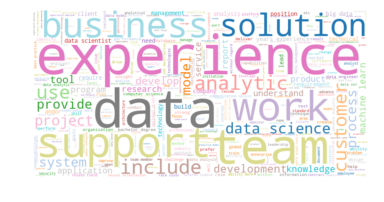

In [126]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# LDA

In [118]:
from gensim import corpora
import gensim
import pyLDAvis.gensim
import pickle

In [116]:
dictionary = corpora.Dictionary(data['cleaned_desc'])
corpus = [dictionary.doc2bow(text) for text in data['cleaned_desc']]

pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [119]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

(0, '0.011*"company" + 0.011*"work" + 0.009*"experience" + 0.007*"team"')
(1, '0.038*"data" + 0.021*"experience" + 0.011*"work" + 0.011*"team"')
(2, '0.020*"data" + 0.011*"work" + 0.010*"experience" + 0.009*"business"')
(3, '0.008*"research" + 0.008*"experience" + 0.008*"team" + 0.007*"work"')
(4, '0.039*"data" + 0.017*"experience" + 0.012*"business" + 0.010*"work"')


In [120]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [121]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
# pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda.html')

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
